In [1]:
## Import the necessary libraries
import sqlite3
import pandas as pd
import os
import time
import numpy as np
import statsmodels.api as sm

In [2]:
# Paths
BASE_DIR = os.path.abspath("..")                      # github_repo/
DATA_DIR = os.path.join(BASE_DIR, "data", "raw")       # github_repo/data/raw
DB_PATH = os.path.join(BASE_DIR, "insurance.db")       # github_repo/insurance.db

In [3]:
# Connect back to the database
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

In [4]:
# Read in the y table (target)
start_y = time.time()
y=pd.read_sql("SELECT * FROM y",conn)
end_y = time.time()
print(f"\nQuery returned {y.shape[0]:,} rows x {y.shape[1]} columns in {end_y - start_y:.2f} seconds")


Query returned 2,263,243 rows x 1 columns in 2.00 seconds


In [5]:
# Read in the x table (features)
start_X = time.time()
X=pd.read_sql("SELECT * FROM X",conn)
end_X = time.time()
print(f"\nQuery returned {X.shape[0]:,} rows x {X.shape[1]} columns in {end_X - start_X:.2f} seconds")
feature_names = X.columns.tolist()


Query returned 2,263,243 rows x 22 columns in 22.94 seconds


In [6]:
# Feature scale the X matrix and break into an 80/20 training and test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [7]:
# This checks out since we had 2,000,000+ original rows
print(X_test.shape)
print(y_test.shape)

(452649, 22)
(452649, 1)


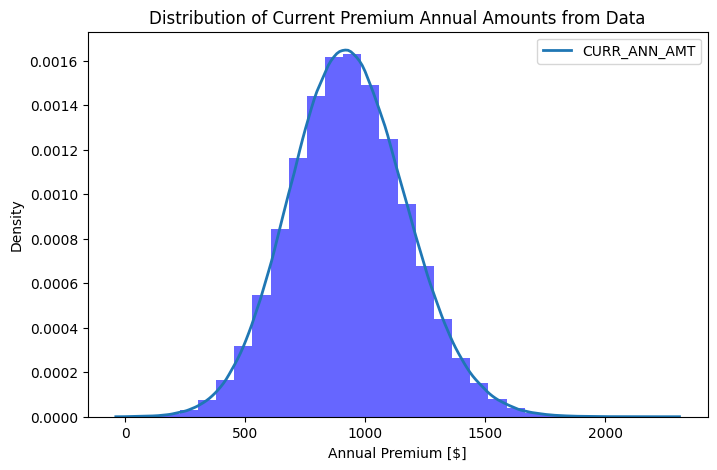

,CURR_ANN_AMT
count,2.263243e+06
mean,9.313080e+02
std,2.439470e+02
min,1.369660e-01
25%,7.649882e+02
50%,9.259615e+02
75%,1.092052e+03
max,2.269374e+03


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(y,bins=30,density=True,alpha=0.6,color='blue')

# We're going to overlay a KDE (smooth curve)
import seaborn as sns
sns.kdeplot(y,color='red',linewidth=2)

plt.title("Distribution of Current Premium Annual Amounts from Data")
plt.xlabel("Annual Premium [$]")
plt.ylabel("Density")
plt.show()

y.describe()

We can see that the target plot look like it could be Gaussian, Poison, or Gamma - we will have to check which one

In [9]:
# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [10]:
# Visually confirm that we added a row
print(X_test_sm.shape)
print(X_test.shape)

(452649, 23)
(452649, 22)


Trying var_power = 0.1


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 0.5


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.5


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 2


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 2.5


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 3


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 3.5


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


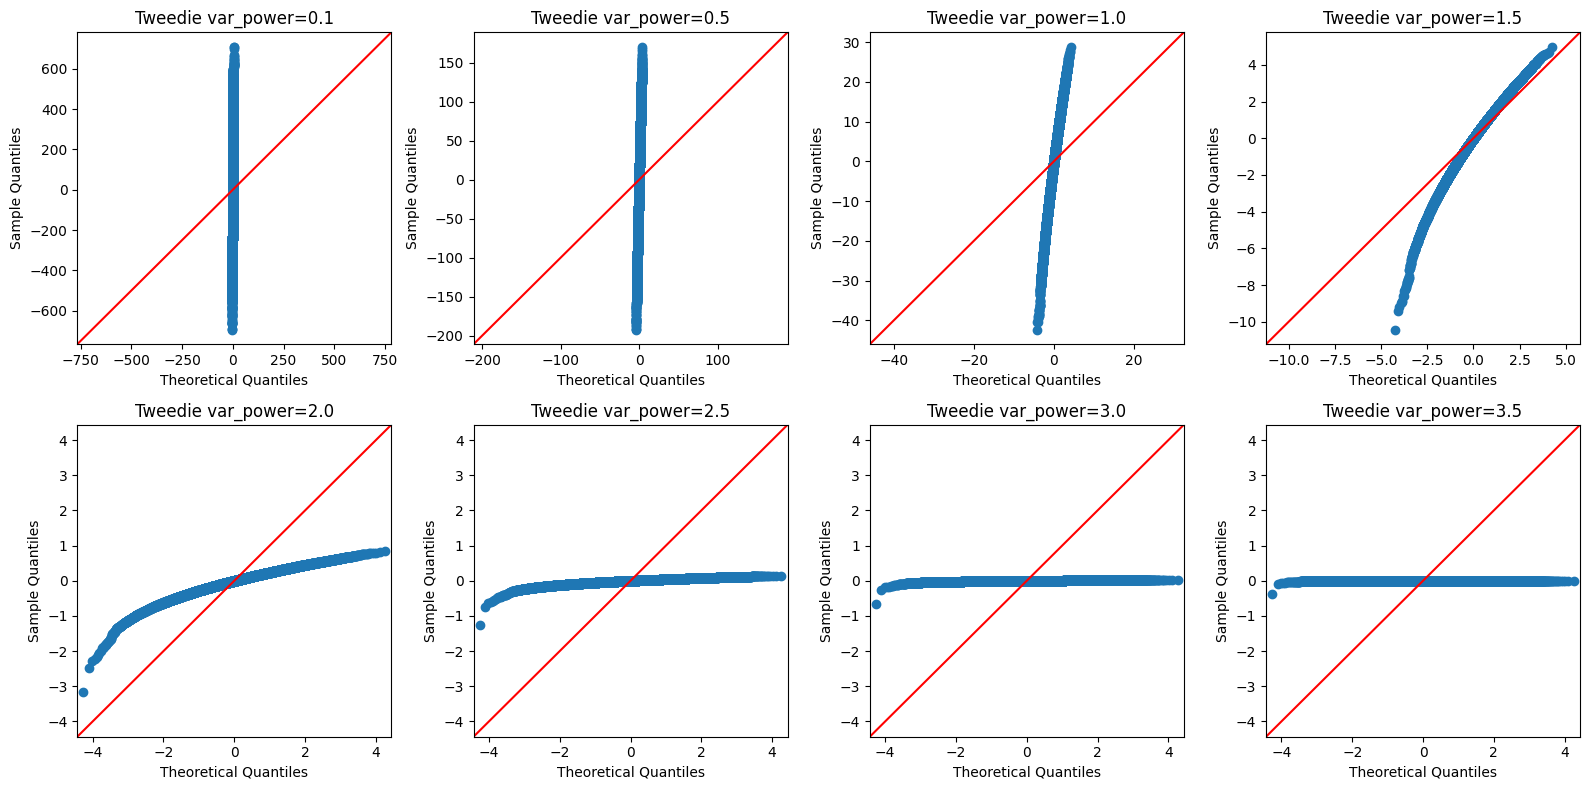

   var_power          AIC:           BIC        RMSE         MAE
0        0.1           NaN  2.871664e+09  237.369740  188.854640
1        0.5           NaN  1.868430e+08  237.370029  188.854679
2        1.0  1.175408e+05  5.133773e+06  237.370736  188.854989
3        1.5  1.380625e+06 -9.382409e+05  237.398168  188.861316
4        2.0  1.383817e+06 -1.143777e+06  237.373362  188.856531
5        2.5           NaN -1.150839e+06  237.375428  188.857900
6        3.0           NaN -1.151087e+06  237.377886  188.859553
7        3.5           NaN -1.151096e+06  237.380913  188.861677


In [11]:
# We will determine if our data mimics a Gaussian (p closer to 0), Poisson (p closer to 1), or Gamma (p closer to 2)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

var_powers = [0.1,0.5,1,1.5,2,2.5,3,3.5]

sample_size = 100_000                   # Let's only fit the first 100,000 data points to save computational expense
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]

results = []

fig, axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()

for ax, vp in zip(axes, var_powers):
    try:
        print(f"Trying var_power = {vp}")
        model = sm.GLM(
            y_sample,
            X_sample,
            family = sm.families.Tweedie(var_power=vp) # Default link function for this is identity so we are all set with that already
        ).fit()

        y_pred = model.predict(X_test_sm)
        MSE = mean_squared_error(y_test,y_pred)
        RMSE = np.sqrt(MSE)
        MAE = mean_absolute_error(y_test,y_pred)

        results.append({'var_power':vp,'AIC:':model.aic,'BIC':model.bic,'RMSE':RMSE,'MAE':MAE})

        sm.qqplot(model.resid_deviance,line='45',ax=ax)
        ax.set_title(f"Tweedie var_power={vp:.1f}")

        

    except Exception as e:
        ax.text(0.5, 0.5, f"Error:\n{str(e)}", ha='center', va='center', wrap=True)
        ax.set_title(f"var_power={vp:.1f} (Error)")

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print(results_df)

Trying var_power = 1.5


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.5714285714285714


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.6428571428571428


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.7142857142857142


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.7857142857142856


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.8571428571428572


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.9285714285714286


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 2.0


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


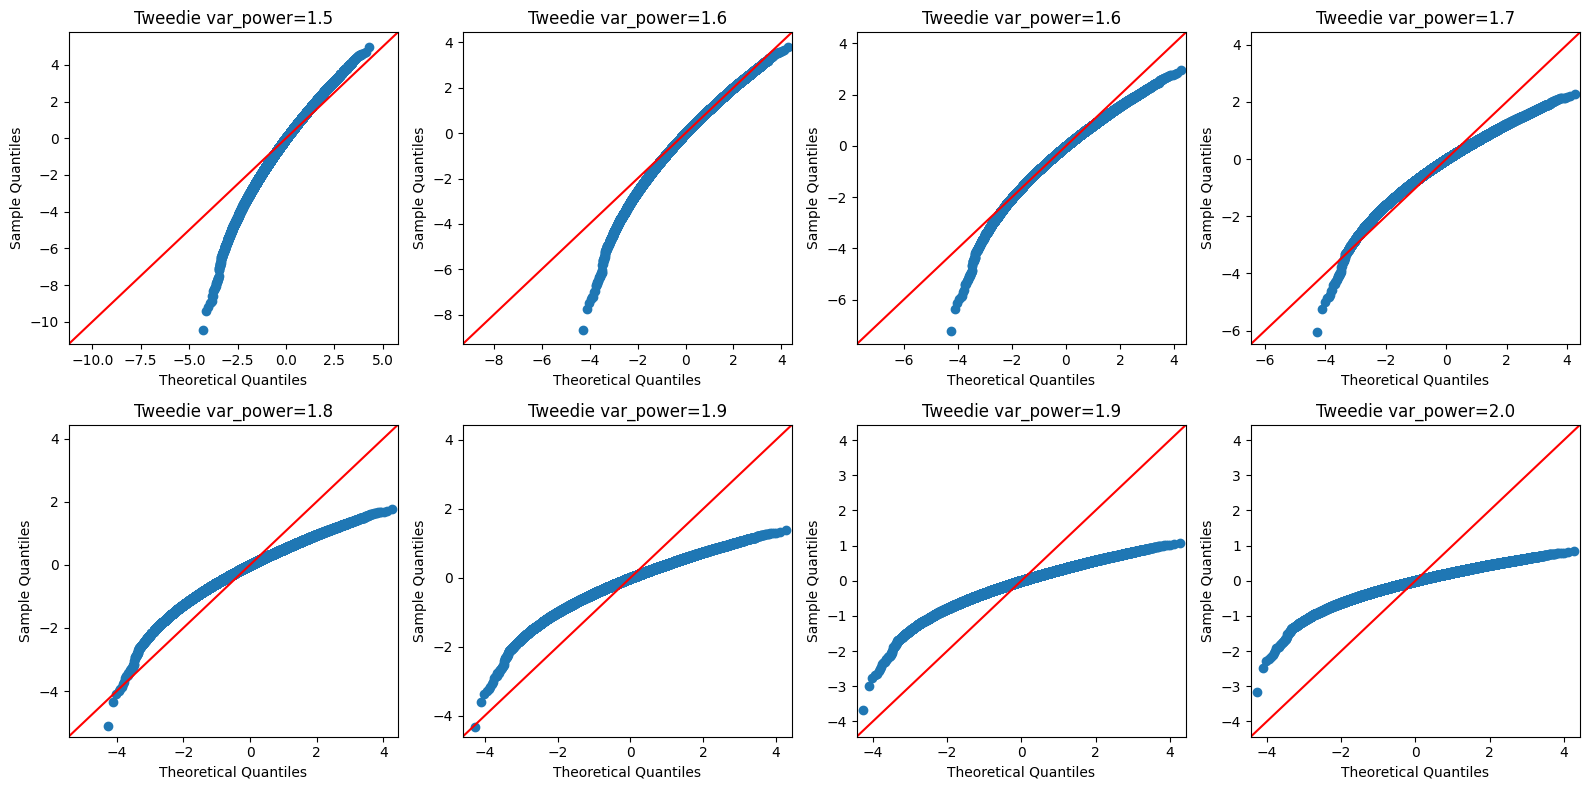

   var_power          AIC:           BIC        RMSE         MAE
0   1.500000  1.380625e+06 -9.382409e+05  237.398168  188.861316
1   1.571429  1.380942e+06 -1.019743e+06  237.372059  188.855731
2   1.642857  1.381321e+06 -1.069991e+06  237.372253  188.855854
3   1.714286  1.381736e+06 -1.100999e+06  237.372472  188.855993
4   1.785714  1.382189e+06 -1.120142e+06  237.372709  188.856144
5   1.857143  1.382685e+06 -1.131962e+06  237.372928  188.856275
6   1.928571  1.383226e+06 -1.139264e+06  237.373165  188.856415
7   2.000000  1.383817e+06 -1.143777e+06  237.373362  188.856531


In [12]:
# We can see that the range of 1.5 to 2 is where we want to hone in on (between Poisson and Gamma)
var_powers = np.linspace(1.5,2,8)

sample_size = 100_000
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]

results = []

fig, axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()

for ax, vp in zip(axes, var_powers):
    try:
        print(f"Trying var_power = {vp}")
        model = sm.GLM(
            y_sample,
            X_sample,
            family = sm.families.Tweedie(var_power=vp) # Default link function for this is identity so we are all set with that already
        ).fit()

        y_pred = model.predict(X_test_sm)
        MSE = mean_squared_error(y_test,y_pred)
        RMSE = np.sqrt(MSE)
        MAE = mean_absolute_error(y_test,y_pred)

        results.append({'var_power':vp,'AIC:':model.aic,'BIC':model.bic,'RMSE':RMSE,'MAE':MAE})


        sm.qqplot(model.resid_deviance,line='45',ax=ax)
        ax.set_title(f"Tweedie var_power={vp:.1f}")

        

    except Exception as e:
        ax.text(0.5, 0.5, f"Error:\n{str(e)}", ha='center', va='center', wrap=True)
        ax.set_title(f"var_power={vp:.1f} (Error)")

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print(results_df)

Trying var_power = 1.4


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.4285714285714286


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.457142857142857


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.4857142857142858


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.5142857142857142


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.542857142857143


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.5714285714285716


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Trying var_power = 1.6


c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


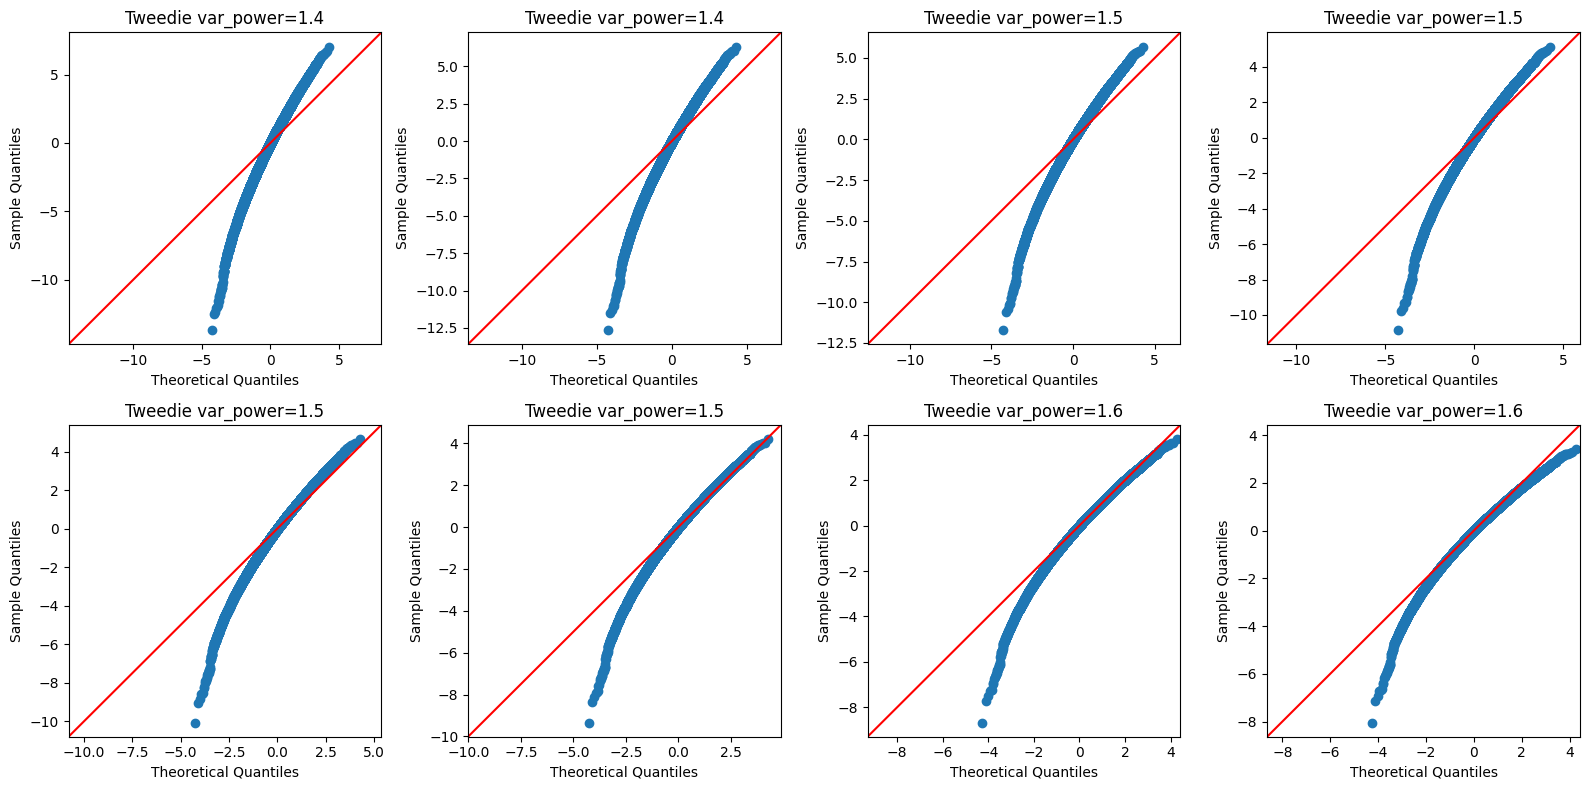

   var_power          AIC:           BIC        RMSE         MAE
0   1.400000  1.380174e+06 -7.327164e+05  237.376807  188.852685
1   1.428571  1.380285e+06 -8.062348e+05  237.373391  188.855120
2   1.457143  1.380405e+06 -8.668095e+05  237.371736  188.855545
3   1.485714  1.380532e+06 -9.167304e+05  237.371815  188.855595
4   1.514286  1.380664e+06 -9.578754e+05  237.371895  188.855641
5   1.542857  1.380800e+06 -9.917889e+05  237.371977  188.855690
6   1.571429  1.380942e+06 -1.019743e+06  237.372062  188.855739
7   1.600000  1.381090e+06 -1.042787e+06  237.372116  188.855753


In [ ]:
# Let's now hone in between 1.4 and 1.6 (We can see this curve is fitting more towards a Gamma distribution)
from sklearn.metrics import mean_squared_error

var_powers = np.linspace(1.4,1.6,8)

sample_size = 100_000
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]

results = []

fig, axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()

for ax, vp in zip(axes, var_powers):
    try:
        print(f"Trying var_power = {vp}")
        model = sm.GLM(
            y_sample,
            X_sample,
            family = sm.families.Tweedie(var_power=vp) # Default link function for this is identity so we are all set with that already
        ).fit()

        sm.qqplot(model.resid_deviance,line='45',ax=ax)
        ax.set_title(f"Tweedie var_power={vp:.1f}")

        y_pred = model.predict(X_test_sm)
        MSE = mean_squared_error(y_test,y_pred)
        RMSE = np.sqrt(MSE)
        MAE = mean_absolute_error(y_test,y_pred)

        results.append({'var_power':vp,'AIC:':model.aic,'BIC':model.bic,'RMSE':RMSE,'MAE':MAE})


    except Exception as e:
        ax.text(0.5, 0.5, f"Error:\n{str(e)}", ha='center', va='center', wrap=True)
        ax.set_title(f"var_power={vp:.1f} (Error)")

plt.tight_layout()
plt.show() #

results_df = pd.DataFrame(results)
print(results_df)

In [14]:
# Now that a Tweedie GLM with a var_power of 1.45 looks the best and is roughly at the lowest point for RMSE, we must now look into the p-values
model = sm.GLM(
    y_sample,
    X_sample,
    family = sm.families.Tweedie(var_power=1.45) # Default link function for this is identity so we are all set with that already
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           CURR_ANN_AMT   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99983
Model Family:                 Tweedie   Df Model:                           16
Link Function:                    Log   Scale:                          2.8044
Method:                          IRLS   Log-Likelihood:            -6.9017e+05
Date:                Wed, 17 Sep 2025   Deviance:                   2.9835e+05
Time:                        11:28:19   Pearson chi2:                 2.80e+05
No. Iterations:                   100   Pseudo R-squ. (CS):            0.05354
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8353      0.001   8454.194      0.0

In [15]:

coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'Std Err': model.bse,
    'z-value':model.tvalues,
    'p-value':model.pvalues,
    '95% CI Lower': model.conf_int()[0],
    '95% CI Upper': model.conf_int()[1]
})

In [16]:
#Temporarily display all rows 
with pd.option_context('display.max_rows',None):
    print(coef_df)

      Feature  Coefficient   Std Err      z-value        p-value  \
const   const     6.835283  0.000809  8454.193609   0.000000e+00   
x1         x1    -0.005057  0.000843    -6.000551   1.966497e-09   
x2         x2     0.007595  0.000887     8.560929   1.119614e-17   
x3         x3    -0.001529  0.003073    -0.497427   6.188878e-01   
x4         x4     0.001518  0.004939     0.307458   7.584946e-01   
x5         x5     0.021968  0.000893    24.606441  1.077780e-133   
x6         x6    -0.007627  0.000927    -8.229654   1.877556e-16   
x7         x7     0.036663  0.000915    40.050363   0.000000e+00   
x8         x8     0.017134  0.001048    16.348661   4.446419e-60   
x9         x9     0.000849  0.000864     0.983026   3.255946e-01   
x10       x10     0.005735  0.001116     5.138443   2.770248e-07   
x11       x11     0.015025  0.000849    17.693883   4.674029e-70   
x12       x12     0.003861  0.000982     3.930549   8.475203e-05   
x13       x13     0.003747  0.003062     1.22369

In [17]:
X.head()

,DAYS_TENURE,age_in_years,LATITUDE,LONGITUDE,income,HAS_CHILDREN,LENGTH_OF_RESIDENCE,marital_status,HOME_MARKET_VALUE,HOME_OWNER,...,lat_median,long_median,marital_status_missing,HAS_CHILDREN_missing,HOME_OWNER_missing,COLLEGE_DEGREE_missing,GOOD_CREDIT_missing,age_in_years_missing,income_missing,LENGTH_OF_RESIDENCE_missing
0,6291.0,66.387,32.964555,-96.819410,80372.176,0.0,6.801,0,624999.5,0.0,...,32.807488,-96.792844,1,0,0,0,0,0,0,0
1,4496.0,58.968,32.964555,-96.819410,125000.000,1.0,2.000,0,624999.5,1.0,...,32.807488,-96.792844,0,0,0,0,0,0,0,0
2,6291.0,55.444,32.600787,-97.101485,80372.176,0.0,6.801,0,112499.5,0.0,...,32.586145,-97.127821,1,1,1,1,1,1,1,1
3,6291.0,64.641,32.563342,-97.058826,70000.000,1.0,7.000,1,137499.5,1.0,...,32.586145,-97.127821,0,0,0,0,0,0,0,0
4,549.0,34.639,33.006625,-97.203735,87500.000,0.0,3.000,0,112499.5,1.0,...,32.996025,-97.212322,0,0,0,0,0,0,0,0


Let's drop the features with a p-value of > 0.05. That would be x3, x4, x9, x13, x14 --> Latitiude, Longitude, Home Market Value, and Home Owner

In [18]:
X = X.drop('LATITUDE',axis=1)
X = X.drop('LONGITUDE',axis=1)
X = X.drop('HOME_MARKET_VALUE',axis=1)
X = X.drop('HOME_OWNER',axis=1)

# After dropping those features, let's repeat the process and see if we have anymore insignificant p-values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
sample_size = 100_000
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]
model = sm.GLM(
    y_sample,
    X_sample,
    family = sm.families.Tweedie(var_power=1.45) # Default link function for this is identity so we are all set with that already
).fit()
#print(model.summary())
coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'Std Err': model.bse,
    'z-value':model.tvalues,
    'p-value':model.pvalues,
    '95% CI Lower': model.conf_int()[0],
    '95% CI Upper': model.conf_int()[1]
    
})
#Temporarily display all rows 
with pd.option_context('display.max_rows',None):
    print(coef_df)

      Feature  Coefficient   Std Err      z-value        p-value  \
const   const     6.835284  0.000809  8453.166561   0.000000e+00   
x1         x1    -0.005014  0.000843    -5.948365   2.708346e-09   
x2         x2     0.007677  0.000887     8.655967   4.887486e-18   
x3         x3     0.022459  0.000852    26.373269  2.776765e-153   
x4         x4    -0.007365  0.000925    -7.958687   1.738742e-15   
x5         x5     0.037790  0.000884    42.750706   0.000000e+00   
x6         x6     0.017955  0.001036    17.331673   2.713177e-67   
x7         x7     0.015319  0.000847    18.084333   4.234588e-73   
x8         x8     0.004137  0.000977     4.232600   2.310054e-05   
x9         x9     0.002520  0.000842     2.994808   2.746175e-03   
x10       x10     0.000093  0.000831     0.111926   9.108822e-01   
x11       x11     0.002543  0.001140     2.231008   2.568059e-02   
x12       x12     0.001078  0.000148     7.297981   2.921178e-13   
x13       x13     0.001078  0.000148     7.29798

This time, we can see that x10, long_median is deemed insignificant

In [19]:
X = X.drop('long_median',axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
sample_size = 100_000
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]
model = sm.GLM(
    y_sample,
    X_sample,
    family = sm.families.Tweedie(var_power=1.45) # Default link function for this is identity so we are all set with that already
).fit()
#print(model.summary())
coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'Std Err': model.bse,
    'z-value':model.tvalues,
    'p-value':model.pvalues,
    '95% CI Lower': model.conf_int()[0],
    '95% CI Upper': model.conf_int()[1]
    
})
#Temporarily display all rows 
with pd.option_context('display.max_rows',None):
    print(coef_df)

      Feature  Coefficient   Std Err      z-value        p-value  \
const   const     6.835284  0.000809  8453.163088   0.000000e+00   
x1         x1    -0.005014  0.000843    -5.948280   2.709747e-09   
x2         x2     0.007677  0.000887     8.656121   4.880923e-18   
x3         x3     0.022462  0.000851    26.394168  1.598562e-153   
x4         x4    -0.007366  0.000925    -7.959894   1.721861e-15   
x5         x5     0.037792  0.000884    42.763220   0.000000e+00   
x6         x6     0.017952  0.001036    17.333114   2.646052e-67   
x7         x7     0.015319  0.000847    18.084120   4.251006e-73   
x8         x8     0.004142  0.000976     4.242337   2.212040e-05   
x9         x9     0.002541  0.000821     3.096659   1.957148e-03   
x10       x10     0.002544  0.001140     2.231709   2.563421e-02   
x11       x11     0.001078  0.000148     7.299882   2.880202e-13   
x12       x12     0.001078  0.000148     7.299882   2.880202e-13   
x13       x13     0.001078  0.000148     7.29988

Business decision here: we are going to remove lat_median too since it makes no sense to disclude long_median but not lat_median

In [20]:
X = X.drop('lat_median',axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

sample_size = 100_000
X_sample = X_train_sm[:sample_size]
y_sample = y_train[:sample_size]
model = sm.GLM(
    y_sample,
    X_sample,
    family = sm.families.Tweedie(var_power=1.45) # Default link function for this is identity so we are all set with that already
)
results = model.fit()
#print(results.summary())
coef_df = pd.DataFrame({
    'Feature': results.params.index,
    'Coefficient': results.params.values,
    'Std Err': results.bse,
    'z-value':results.tvalues,
    'p-value':results.pvalues,
    '95% CI Lower': results.conf_int()[0],
    '95% CI Upper': results.conf_int()[1]  
})
#Temporarily display all rows 
with pd.option_context('display.max_rows',None):
    print(coef_df)

      Feature  Coefficient   Std Err      z-value        p-value  \
const   const     6.835284  0.000809  8452.859986   0.000000e+00   
x1         x1    -0.005003  0.000843    -5.935028   2.937958e-09   
x2         x2     0.007610  0.000887     8.582445   9.287771e-18   
x3         x3     0.022705  0.000847    26.790990  4.114962e-158   
x4         x4    -0.007383  0.000925    -7.978683   1.479025e-15   
x5         x5     0.037572  0.000881    42.651033   0.000000e+00   
x6         x6     0.017994  0.001036    17.374718   1.282351e-67   
x7         x7     0.015398  0.000847    18.185222   6.758133e-74   
x8         x8     0.004235  0.000976     4.338516   1.434478e-05   
x9         x9     0.002470  0.001140     2.166876   3.024429e-02   
x10       x10     0.001093  0.000148     7.404470   1.316752e-13   
x11       x11     0.001093  0.000148     7.404470   1.316752e-13   
x12       x12     0.001093  0.000148     7.404470   1.316752e-13   
x13       x13     0.001093  0.000148     7.40447

In [21]:
feature_names = ['DAYS_TENURE','age_in_years','income','HAS_CHILDREN','LENGTH_OF_RESIDENCE','marital_status','COLLEGE_DEGREE','GOOD_CREDIT','marital_status_missing','HAS_CHILDREN_missing','HOME_OWNER_missing','COLLEGE_DEGREE_missing','GOOD_CREDIT_missing',
                 'age_in_years_missing','income_missing','LENGTH_OF_RESIDENCE_missing']
mapped_names = ['const'] + feature_names
coef_df['Feature'] = mapped_names
print(coef_df)

                           Feature  Coefficient   Std Err      z-value  \
const                        const     6.835284  0.000809  8452.859986   
x1                     DAYS_TENURE    -0.005003  0.000843    -5.935028   
x2                    age_in_years     0.007610  0.000887     8.582445   
x3                          income     0.022705  0.000847    26.790990   
x4                    HAS_CHILDREN    -0.007383  0.000925    -7.978683   
x5             LENGTH_OF_RESIDENCE     0.037572  0.000881    42.651033   
x6                  marital_status     0.017994  0.001036    17.374718   
x7                  COLLEGE_DEGREE     0.015398  0.000847    18.185222   
x8                     GOOD_CREDIT     0.004235  0.000976     4.338516   
x9          marital_status_missing     0.002470  0.001140     2.166876   
x10           HAS_CHILDREN_missing     0.001093  0.000148     7.404470   
x11             HOME_OWNER_missing     0.001093  0.000148     7.404470   
x12         COLLEGE_DEGREE_missing    

Now that we are all set with the features, let's take a look at the coefficients and interpret them.

c:\Users\JDECKE46\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


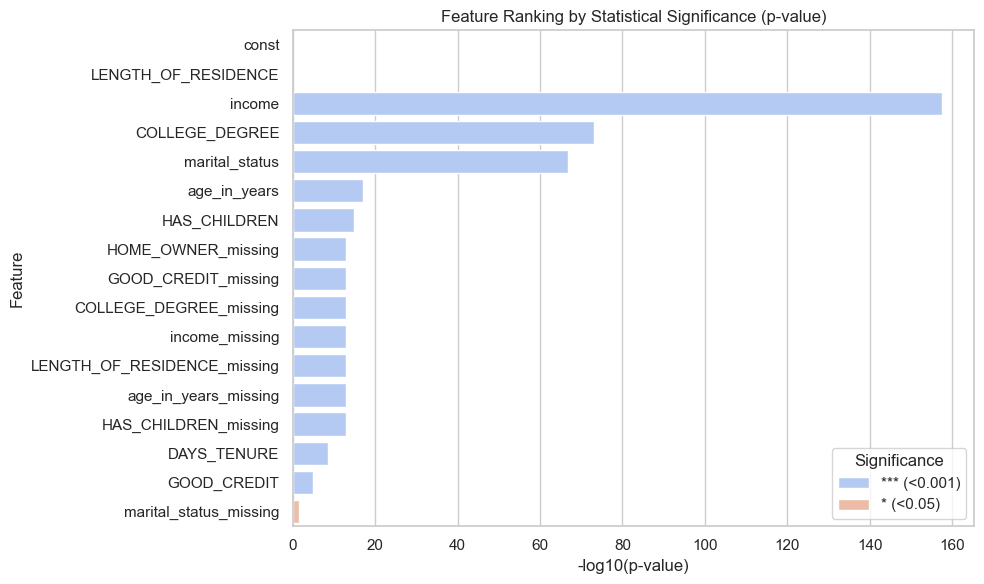

In [22]:
coef_df_sorted = coef_df.sort_values('p-value', ascending=True).reset_index(drop=True)
def significance_level(p):
    if p < 0.001:
        return '*** (<0.001)'
    elif p < 0.01:
        return '** (<0.01)'
    elif p < 0.05:
        return '* (<0.05)'
    else:
        return 'ns (≥0.05)'

coef_df_sorted['Significance'] = coef_df_sorted['p-value'].apply(significance_level)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Barplot of -log10(p-value) for better scaling
sns.barplot(
    data=coef_df_sorted,
    x=-np.log10(coef_df_sorted['p-value']),
    y='Feature',
    hue='Significance',
    dodge=False,
    palette='coolwarm'
)

plt.xlabel('-log10(p-value)')
plt.ylabel('Feature')
plt.title('Feature Ranking by Statistical Significance (p-value)')
plt.legend(title='Significance')
plt.tight_layout()
plt.show()


We can see that income and college_degree are the two most statistically significant p-values. Having a higher income households typically own more vehicles and purchase more extensive coverage. Having a college degree typically correlates with income so that makes sense.

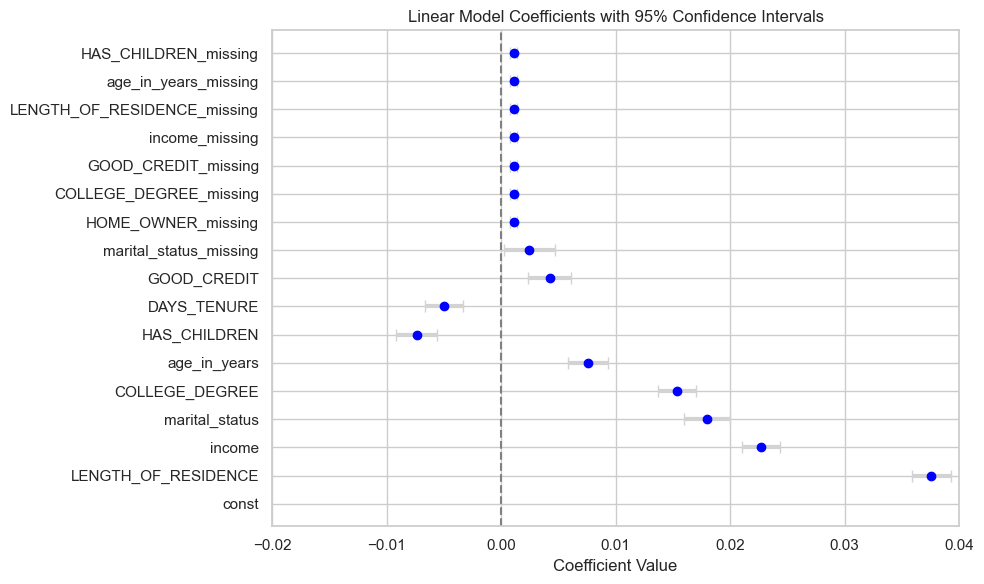

In [23]:
# Sort by absolute coefficient size (optional for clarity)
coef_df_sorted = coef_df.copy()
coef_df_sorted['abs_coef'] = coef_df_sorted['Coefficient'].abs()
coef_df_sorted = coef_df_sorted.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(10, 6))
plt.errorbar(
    coef_df_sorted['Coefficient'],
    coef_df_sorted['Feature'],
    xerr=[
        coef_df_sorted['Coefficient'] - coef_df_sorted['95% CI Lower'],
        coef_df_sorted['95% CI Upper'] - coef_df_sorted['Coefficient']
    ],
    fmt='o',
    color='blue',
    ecolor='lightgray',
    elinewidth=3,
    capsize=4
)

plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Linear Model Coefficients with 95% Confidence Intervals')
plt.xlim(-0.02,0.04)
plt.tight_layout()
plt.show()

Larger magnitudes of coefficients lead to stronger influence on predictions (shows the effect of one unit change in a feature)

Positive coefficients means increasing that feature typically increases the target predictions.

-Length of Residence --> Potentially bundling home and auto, or that means they are more stable since their mortgage could be almost up and they start spending more on cars.
-Income --> Similar reason as above.
-Marital Status --> Multiple cars on the same policy instead of just one

Negative coefficientss means increasing that feature typically decreases the target predictions.

-Has_Children --> Families typically drive very safe and have safer vehicles like minivans. They don't engage in risky behaviors.
-Days_Tenure --> Loyalty to the insurnace company, you could argue that customers who engage in one company tend to be less likely to take risks.

In [24]:
# Predict on a test set
from sklearn.metrics import r2_score
y_pred = results.predict(X_test_sm)

model_mae = mean_absolute_error(y_test,y_pred)
model_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Baseline: predict mean of y_train for everyone
baseline_pred = np.full_like(y_test,y_train.mean(),dtype=float)

baseline_mae = mean_absolute_error(y_test,baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test,baseline_pred))

r2 = r2_score(y_test,y_pred)
baseline_r2 = r2_score(y_test,y_pred)

print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"Model MAE: {model_mae:.2f}")
print(f"MAE Gap: {baseline_mae - model_mae:.2f}")

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Model RMSE: {model_rmse:.2f}")
print(f"RMSE Gap: {baseline_rmse - model_rmse:.2f}")

print(f"R2 Score: {r2:.2f}")
print(f"Baseline R2 Score: {baseline_r2:.2f}")

Baseline MAE: 194.10
Model MAE: 188.89
MAE Gap: 5.20
Baseline RMSE: 243.90
Model RMSE: 237.41
RMSE Gap: 6.48
R2 Score: 0.05
Baseline R2 Score: 0.05


Interpretability: If Model MAE / RMSE < Baseline, than the GLM is better than just guessing the average. The bigger the gap, the more predictive power you have

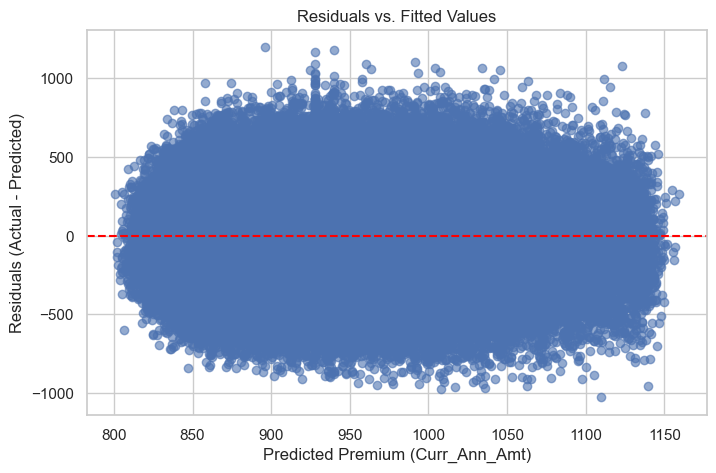

In [25]:
# Let's plot Residual diagnostics
y_test_array = np.ravel(y_test)
y_pred_array = np.ravel(y_pred)

residuals = y_test_array - y_pred_array

plt.figure(figsize=(8,5))
plt.scatter(y_pred,residuals,alpha=0.6)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel("Predicted Premium (Curr_Ann_Amt)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Fitted Values")
plt.show()

We can see from the plot that the residuals are well centered around 0. Variance tends to slightly increase with premium size which is to be expected since larger policy naturally have more variability (more potential reasons why in different features). 

Potential room for improvement:
-Feature engineering (combining certain features via multiplication)
-Take nonlinearities into effect
-Seek to add more relevant data if available (aka more features)

In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_mae = mean_absolute_error(y_test,y_pred)
model_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Baseline: predict mean of y_train for everyone
baseline_pred = np.full_like(y_test,y_train.mean(),dtype=float)

baseline_mae = mean_absolute_error(y_test,baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test,baseline_pred))

r2 = r2_score(y_test,y_pred)
baseline_r2 = r2_score(y_test,y_pred)

print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"Model MAE: {model_mae:.2f}")
print(f"MAE Gap: {baseline_mae - model_mae:.2f}")

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Model RMSE: {model_rmse:.2f}")
print(f"RMSE Gap: {baseline_rmse - model_rmse:.2f}")

print(f"R2 Score: {r2:.2f}")
print(f"Baseline R2 Score: {baseline_r2:.2f}")

Baseline MAE: 194.10
Model MAE: 186.79
MAE Gap: 7.31
Baseline RMSE: 243.90
Model RMSE: 234.79
RMSE Gap: 9.10
R2 Score: 0.07
Baseline R2 Score: 0.07


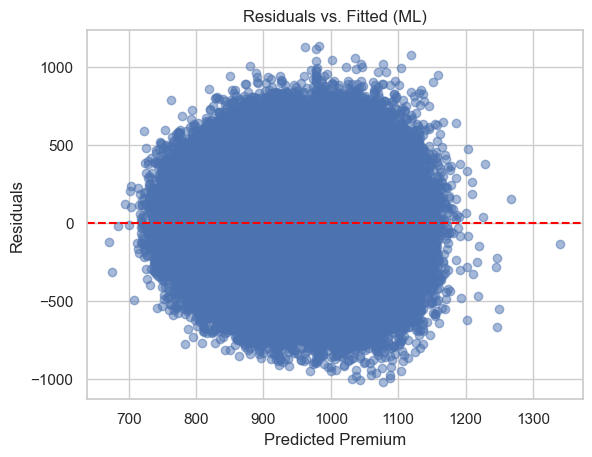

In [27]:
y_test_array = np.ravel(y_test)
y_pred_array = np.ravel(y_pred)

residuals = y_test_array - y_pred_array
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Premium")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted (ML)")
plt.show()